In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/austin-animal-center-outcomes/Austin_Animal_Center_Outcomes.csv


# Context

Austin Animal Center is the largest open-intake animal shelter in Central Texas, accepting animals regardless of age, health, species, or breed. It serves the City of Austin and Travis County and operates under a no-kill plan. This dataset reflects animal outcomes from October 1, 2023 to March 7, 2025.

# Objective
This project has two main objectives:
1. To expand my data analysis skillset by practicing pandas queries and data visualizations.
2. To identify possible trends in adoptions at the Austin Animal Center, namely by answering the following questions:

**Questions I want to answer:**
1. How many records are in the dataset?
2. What are the most common animal types?
3. What are the most common breeds for dogs and cats?
4. What are the busiest months for animal intakes?
5. Has the number of adoptions changed over time?
6. What are the most common outcomes for animals?
7. Do certain breeds have higher adoption rates?
8. Do younger animals get adopted more quickly?
9. Are certain zip codes associated with more intakes or adoptions?
10. How long do animals typically stay in the shelter before adoption?

# Exploring the Dataset's Structure

In [2]:
# Reading the data
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        dataset = os.path.join(dirname, filename)

df = pd.read_csv(dataset)
df_backup = df.copy()

/kaggle/input/austin-animal-center-outcomes/Austin_Animal_Center_Outcomes.csv


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172113 entries, 0 to 172112
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         172113 non-null  object
 1   Name              122845 non-null  object
 2   DateTime          172113 non-null  object
 3   MonthYear         172113 non-null  object
 4   Date of Birth     172113 non-null  object
 5   Outcome Type      172071 non-null  object
 6   Outcome Subtype   78842 non-null   object
 7   Animal Type       172113 non-null  object
 8   Sex upon Outcome  172111 non-null  object
 9   Age upon Outcome  172106 non-null  object
 10  Breed             172113 non-null  object
 11  Color             172113 non-null  object
dtypes: object(12)
memory usage: 15.8+ MB


Changing data to correct datatypes

In [4]:
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
df['MonthYear'] = pd.to_datetime(df['MonthYear'],  errors='coerce')
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce')

<ipython-input-4-a1bf5901da9c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
<ipython-input-4-a1bf5901da9c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['MonthYear'] = pd.to_datetime(df['MonthYear'],  errors='coerce')


# Handling Duplicates and Incorrect/Missing Values
All duplicate entries should be dropped, and animals without names will be named "Unknown."

In [5]:
df.drop_duplicates()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A882831,*Hamilton,2023-07-01 18:12:00,2023-07-01,2023-03-25,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,2019-05-08 18:20:00,2019-05-01,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,2018-07-18 16:02:00,2018-07-01,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A821648,NaN,2020-08-16 11:38:00,2020-08-01,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
4,A720371,Moose,2016-02-13 17:59:00,2016-02-01,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
...,...,...,...,...,...,...,...,...,...,...,...,...
172108,A922949,*Scout,2025-03-07 11:45:00,2025-03-01,2024-12-16,Adoption,Foster,Dog,Neutered Male,2 months,Chihuahua Shorthair Mix,Buff/White
172109,A925959,NaN,2025-03-07 11:24:00,2025-03-01,2021-03-03,Transfer,Partner,Dog,Intact Male,4 years,Dachshund/Chihuahua Shorthair,Black/White
172110,A925235,*Gertrude,2025-03-07 12:48:00,2025-03-01,2019-02-27,Adoption,NaN,Dog,Spayed Female,6 years,Miniature Schnauzer,Black/Black
172111,A924228,*Penny Lane,2025-03-07 12:41:00,2025-03-01,2025-01-06,Adoption,NaN,Dog,Spayed Female,1 month,Australian Cattle Dog/Pit Bull,Blue Tick


Are there any inconsistent or unexpected values (e.g., negative ages, incorrect dates)?

In [6]:
df['Name'].fillna('Unknown', inplace=True)

<ipython-input-6-c9c58b5c4e5b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Name'].fillna('Unknown', inplace=True)


## Age
The "age upon outcome" is inconvenient to use for quantitative analysis. Let's calculate age manually using 'DateTime' and 'Date of Birth' and measure it in # of days.

In [7]:
df['age_upon_outcome_days'] = (df['DateTime'] - df['Date of Birth']).dt.days
df['age_upon_outcome_days'].describe()

def fix_negative_age(row):
    return max(row.age_upon_outcome_days, 0)

df['age_upon_outcome_days'] = df.apply(fix_negative_age, axis='columns')

# Exploratory Analysis
## 1. How many total records/animals are in the dataset?
172113 records, 154722 unique animals

In [8]:
df['Animal ID'].describe()

count      172113
unique     154722
top       A721033
freq           33
Name: Animal ID, dtype: object

## 2. What are the most common animal types?


In [9]:
df['Animal Type'].value_counts()

Animal Type
Dog          93718
Cat          68652
Other         8839
Bird           870
Livestock       34
Name: count, dtype: int64

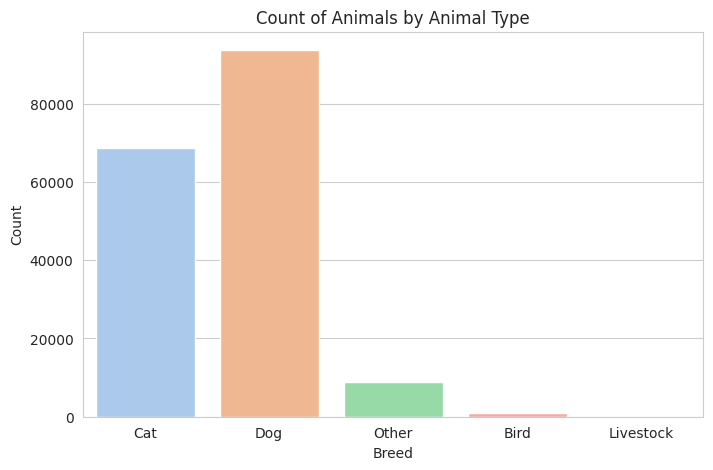

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x='Animal Type', data=df, palette='pastel')

plt.title("Count of Animals by Animal Type")
plt.xlabel("Breed")
plt.ylabel("Count")

plt.show()

3. What are the most common breeds for dogs and cats?

In [11]:
df[df['Animal Type'] == 'Dog']['Breed'].value_counts()

Breed
Pit Bull Mix                              10113
Labrador Retriever Mix                     8734
Chihuahua Shorthair Mix                    6901
German Shepherd Mix                        4038
Pit Bull                                   3341
                                          ...  
Labrador Retriever/Saluki                     1
Bull Terrier Miniature/German Shepherd        1
Basset Hound/Beauceron                        1
Boxer/American Pit Bull Terrier               1
Doberman Pinsch/Alaskan Husky                 1
Name: count, Length: 2639, dtype: int64

In [12]:
df[df['Animal Type'] == 'Cat']['Breed'].value_counts()

Breed
Domestic Shorthair Mix                      34026
Domestic Shorthair                          23197
Domestic Medium Hair Mix                     3376
Domestic Medium Hair                         2068
Domestic Longhair Mix                        1687
                                            ...  
Japanese Bobtail/American Curl Shorthair        1
Savannah                                        1
Domestic Shorthair/Bengal                       1
Turkish Angora                                  1
Bombay                                          1
Name: count, Length: 110, dtype: int64

4. What are the busiest months for animal intakes?


In [13]:
df['outcome_month'] = df['MonthYear'].dt.month
df['outcome_year'] = df['MonthYear'].dt.year

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


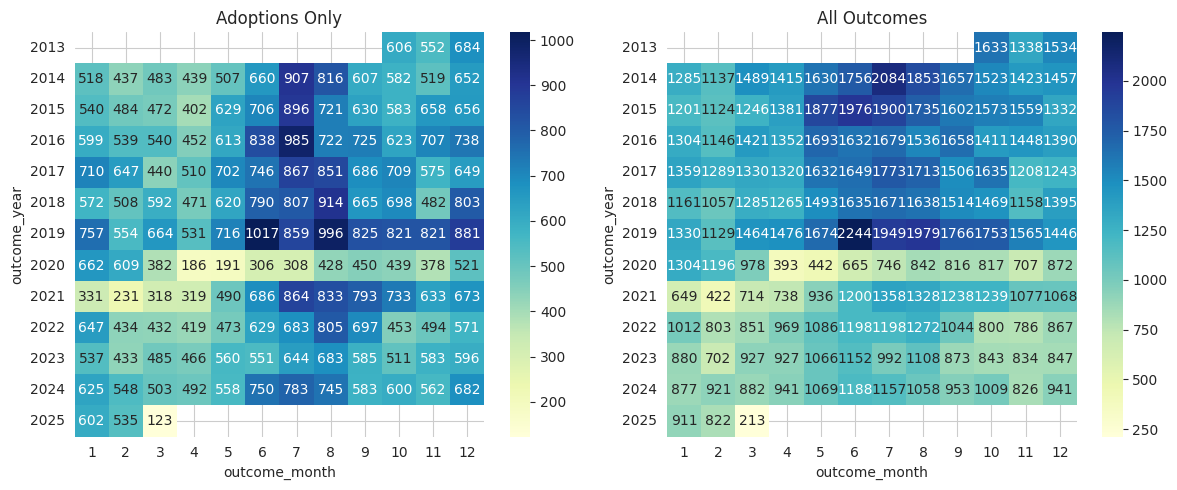

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df_adopted = df[df['Outcome Type'] == 'Adoption']
df_outcomes_adopted = df_adopted.groupby(['outcome_year', 'outcome_month']).size().reset_index(name='count')
heatmap = ( df_outcomes_adopted.pivot(index='outcome_year', columns='outcome_month', values= "count"))
sns.heatmap(heatmap, cmap='YlGnBu', ax=axes[0], annot=True, fmt=".0f")
axes[0].set_title('Adoptions Only')

df_outcomes = df.groupby(['outcome_year', 'outcome_month']).size().reset_index(name='count')
heatmap2 = ( df_outcomes.pivot(index='outcome_year', columns='outcome_month', values= "count"))
sns.heatmap(heatmap2, cmap='YlGnBu', ax=axes[1], annot=True, fmt=".0f")
axes[1].set_title('All Outcomes')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


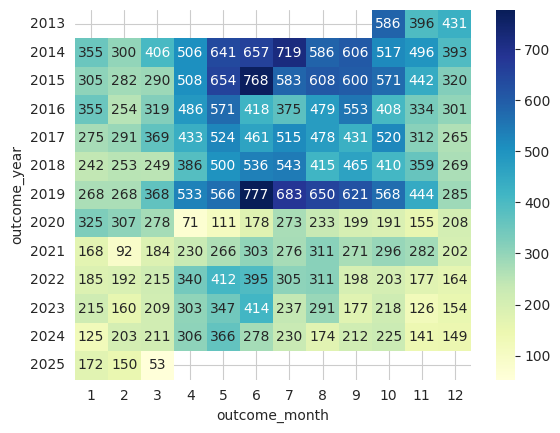

In [15]:
df_transfer = df[df['Outcome Type'] == 'Transfer']
df_outcomes_transfer = df_transfer.groupby(['outcome_year', 'outcome_month']).size().reset_index(name='count')
heatmap = ( df_outcomes_transfer.pivot(index='outcome_year', columns='outcome_month', values= "count"))
sns.heatmap(heatmap, cmap='YlGnBu', annot=True, fmt=".0f")
axes[0].set_title('Adoptions Only')
plt.show()

## 6. What are the most common outcomes for animals?

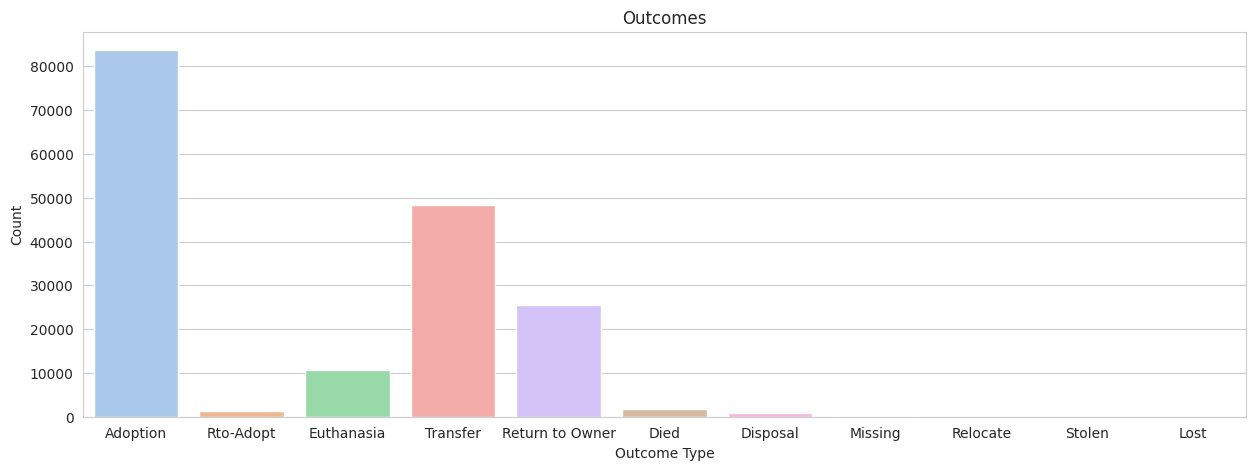

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.countplot(x='Outcome Type', data=df, palette='pastel')

plt.title("Outcomes")
plt.xlabel("Outcome Type")
plt.ylabel("Count")

plt.show()

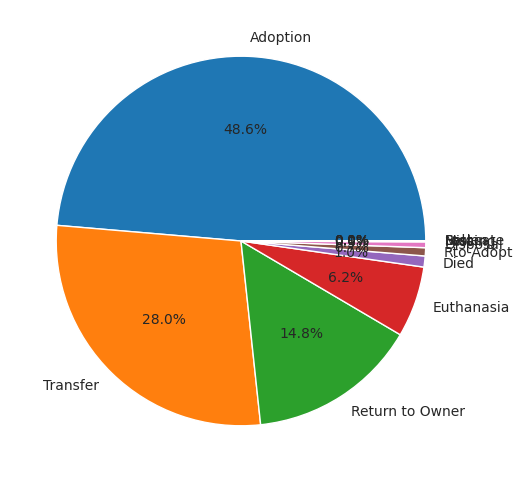

In [17]:
outcome_counts = df['Outcome Type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(outcome_counts,labels=outcome_counts.index, autopct="%1.1f%%")
plt.show()

# create 'other' category to lump all the small ones together
# make another pie chart to break down the really small categories

7. Do certain breeds have higher adoption rates?

In [18]:
df.groupby('Breed')['Outcome Type'].apply(lambda x: (x=='Adoption').mean() * 100).sort_values(ascending=False)

Breed
Yorkshire Terrier/Yorkshire Terrier          100.0
Harrier/Anatol Shepherd                      100.0
Border Terrier/Dachshund Wirehair            100.0
Border Terrier/Jack Russell Terrier          100.0
Greyhound/Weimaraner                         100.0
                                             ...  
Irish Wolfhound/Australian Shepherd            0.0
Irish Wolfhound/American Pit Bull Terrier      0.0
Rabbit Sh/Lop-Mini                             0.0
Raccoon                                        0.0
Maltese/Shih Tzu                               0.0
Name: Outcome Type, Length: 2990, dtype: float64

In [19]:
breed_counts = df['Breed'].value_counts()
popular_breeds = breed_counts[breed_counts>170000*.01].index
df_filtered = df[df['Breed'].isin(popular_breeds)]
df_filtered.groupby('Breed').agg( total_count=("Breed", "count"), 
                                 adopt_perc=('Outcome Type', lambda x: (x=='Adoption').mean() * 100 )).sort_values(by='adopt_perc', ascending = False)

,total_count,adopt_perc
Breed,,
Domestic Medium Hair,2068,62.185687
Australian Cattle Dog Mix,1982,58.779011
German Shepherd,1791,58.179788
Domestic Shorthair,23197,57.938527
German Shepherd Mix,4038,56.488361
Labrador Retriever Mix,8734,55.598809
Labrador Retriever,1998,51.251251
Pit Bull,3341,51.032625
Domestic Medium Hair Mix,3376,49.822275


In [20]:
df_filtered.groupby('Breed').agg(total_count=('Outcome Type', 'count'), adopt_perc=('Outcome Type', lambda x: (x=='Adoption').mean() * 100)).sort_values(by='total_count', ascending=False)

,total_count,adopt_perc
Breed,,
Domestic Shorthair Mix,34026,46.299888
Domestic Shorthair,23191,57.938527
Pit Bull Mix,10112,43.004054
Labrador Retriever Mix,8733,55.598809
Chihuahua Shorthair Mix,6900,48.079988
German Shepherd Mix,4038,56.488361
Domestic Medium Hair Mix,3376,49.822275
Pit Bull,3338,51.032625
Bat,2292,0.000000


In [21]:
df_filtered[df_filtered['Animal Type']=='Dog'].groupby('Breed').agg(total_count=('Outcome Type', 'count'), adopt_perc=('Outcome Type', lambda x: (x=='Adoption').mean() * 100)).sort_values(by='total_count', ascending=False)

,total_count,adopt_perc
Breed,,
Pit Bull Mix,10112,43.004054
Labrador Retriever Mix,8733,55.598809
Chihuahua Shorthair Mix,6900,48.079988
German Shepherd Mix,4038,56.488361
Pit Bull,3338,51.032625
Labrador Retriever,1998,51.251251
Australian Cattle Dog Mix,1982,58.779011
Chihuahua Shorthair,1981,46.744069
German Shepherd,1788,58.179788


In [22]:
df[df['Breed'] == 'Belgian Malinois'].agg(total_count=('Outcome Type', 'count'), adopt_perc=('Outcome Type', lambda x: (x=='Adoption').mean() * 100))

,Outcome Type
total_count,109.000000
adopt_perc,51.818182


In [23]:
df_filtered[df_filtered['Animal Type']=='Dog'].groupby('Breed').agg(total_count=('Outcome Type', 'count'), adopt_perc=('Outcome Type', lambda x: (x=='Adoption').mean() * 100)).sort_values(by='adopt_perc', ascending=False)

,total_count,adopt_perc
Breed,,
Australian Cattle Dog Mix,1982,58.779011
German Shepherd,1788,58.179788
German Shepherd Mix,4038,56.488361
Labrador Retriever Mix,8733,55.598809
Labrador Retriever,1998,51.251251
Pit Bull,3338,51.032625
Chihuahua Shorthair Mix,6900,48.079988
Chihuahua Shorthair,1981,46.744069
Pit Bull Mix,10112,43.004054


What is a good cutoff for filtering?

10. How long do animals typically stay in the shelter before adoption?

In [24]:
df.groupby('Outcome Type')['age_upon_outcome_days'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome Type,,,,,,,,
Adoption,83709.0,613.385347,875.231895,0.0,86.00,262.0,745.00,7307.0
Died,1658.0,563.377563,1053.448128,0.0,33.00,77.0,730.00,5926.0
Disposal,868.0,568.804147,671.549977,0.0,365.00,368.5,732.00,6036.0
Euthanasia,10686.0,908.779805,1170.778932,0.0,365.00,618.0,740.00,8401.0
Lost,2.0,429.500000,437.699098,120.0,274.75,429.5,584.25,739.0
Missing,92.0,524.684783,805.347252,19.0,109.00,233.5,737.00,5483.0
Relocate,28.0,821.214286,1574.675095,31.0,185.00,367.5,731.25,6677.0
Return to Owner,25529.0,1495.160523,1343.512497,0.0,546.00,1047.0,2191.00,10227.0
Rto-Adopt,1230.0,1242.447154,1148.964072,0.0,391.50,750.0,1825.00,6210.0


In [25]:
breed_counts = df['Breed'].value_counts()
popular_breeds = breed_counts[(breed_counts>100) & (breed_counts<150)].index
df_other = df[df['Breed'].isin(popular_breeds)]
df_other.groupby('Breed').agg( total_count=("Breed", "count"), 
                                 adopt_perc=('Outcome Type', lambda x: (x=='Adoption').mean() * 100 )).sort_values(by='adopt_perc', ascending = False)

,total_count,adopt_perc
Breed,,
Redbone Hound Mix,114,69.298246
Siberian Husky/German Shepherd,129,68.217054
Black Mouth Cur,120,67.500000
Catahoula,144,67.361111
German Shepherd/Siberian Husky,110,64.545455
Australian Cattle Dog/Labrador Retriever,138,63.768116
Whippet Mix,107,61.682243
Manchester Terrier Mix,132,61.363636
Harrier Mix,106,60.377358
